# 可视化代价函数

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 制造数据集

In [2]:
def dataset(w, b):
    """
    :params w: 模型权重
    :params b: 模型截距
    """
    x = (np.random.random(100**len(w)) * 10 ).reshape(-1, len(w))
    w = np.array(w).reshape(-1, 1)
    x.sort(axis=0)
    print(x.shape, w.shape)
    y = x@w + b
    y += np.random.normal(size=y.shape) * 0.1

    df = pd.DataFrame(x, columns=[f"x_{i+1}" for i in range(len(w))])
    df['y'] = y

    return df

(100, 1) (1, 1)


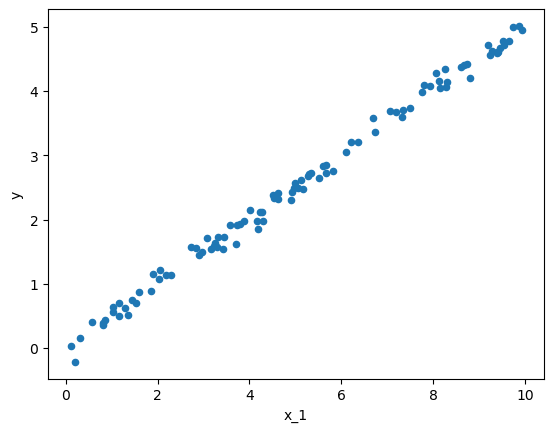

In [3]:
# 制造数据集
df = dataset([0.5,], 0.0)
df.plot.scatter(x='x_1', y='y')
plt.show()

In [4]:
# 设定 w 范围 和 b 的范围 

ws = np.arange(0, 4, 0.02)
bs = np.arange(-20.0, 20.0, 0.2)

In [9]:
def calc_j(df, w, b):
    y = df['y'].values
    x = df['x_1'].values
    y_hat = w*x - b
    l = ((y_hat - y)**2).mean()
    
    return l

J = np.array([[calc_j(df, w, b) for w in ws] for b in bs])

W, B = np.meshgrid(ws, bs)

## 绘制等高线图

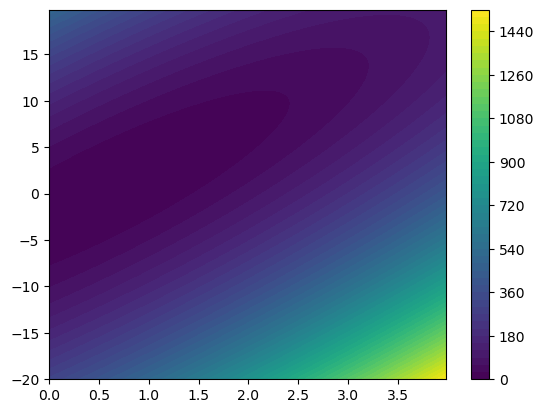

In [16]:
cf = plt.contourf(W, B, J, 50, cmap='viridis')
# plt.contour(W, B, J, 50,)
plt.colorbar(cf)
plt.show()

## 绘制3D图

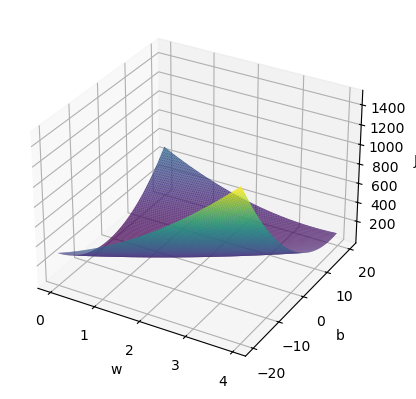

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J')
plt.show()